In [2]:
import tensorflow as tf
import keras
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


CATEGORIES = ["Breakouts","fracture","nofracture"]


c:\programdata\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# First we test if we can open the files:

data0 = pd.read_csv('annotations.csv',sep=',',names = ['img_address','n1','n2','n3','n4','classe'])
classes = pd.read_csv('classes.csv',sep = ',',names = ['classe','number'])
data0.head()

,img_address,n1,n2,n3,n4,classe
0,images/000001.jpg,97,1,211,180,Breakouts
1,images/000002.jpg,36,5,83,175,fracture
2,images/000003.jpg,5,5,175,175,nofracture
3,images/000004.jpg,65,37,147,156,Breakouts
4,images/000005.jpg,61,5,117,175,fracture


In [4]:
classes

,classe,number
0,Breakouts,0
1,fracture,1
2,nofracture,2


In [4]:
SHAPE = data0.shape[0]
SHAPE

30000

The img belongs to a fracture class.


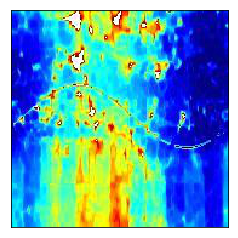

In [5]:
import random
j=int(random.randint(1,100))

imgs = cv2.imread(data0['img_address'][j])
title = data0['classe'][j]
plt.imshow(imgs)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
print('The img belongs to a', title, 'class.')



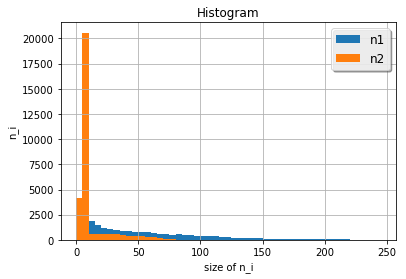

In [13]:
pp = 50
bin_list = [0 + 250*i/pp  for i in range(pp)] #change the binning
data0.n1.hist(bins = bin_list,label = 'n1')
data0.n2.hist(bins = bin_list,label = 'n2')
#data0.n3.hist(bins = bin_list,label = 'n3')
#data0.n4.hist(bins = bin_list,label = 'n4')

plt.xlabel('size of n_i')   #name of the X axis
plt.ylabel('n_i') #name of the Y axis
plt.title('Histogram')  #Title

legend = plt.legend(loc='upper right', shadow=True, fontsize='large') #Calling the Legend

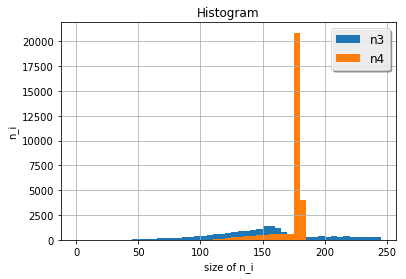

In [14]:
pp = 50
bin_list = [0 + 250*i/pp  for i in range(pp)] #change the binning
data0.n3.hist(bins = bin_list,label = 'n3')
data0.n4.hist(bins = bin_list,label = 'n4')
#data0.n3.hist(bins = bin_list,label = 'n3')
#data0.n4.hist(bins = bin_list,label = 'n4')

plt.xlabel('size of n_i')   #name of the X axis
plt.ylabel('n_i') #name of the Y axis
plt.title('Histogram')  #Title

legend = plt.legend(loc='upper right', shadow=True, fontsize='large') #Calling the Legend

# X = images ; y = [n1,n2,n3,n4]

# Let's do the Breakout regression:

In [16]:
data0.head()

,img_address,n1,n2,n3,n4,classe
0,images/000001.jpg,97,1,211,180,Breakouts
1,images/000002.jpg,36,5,83,175,fracture
2,images/000003.jpg,5,5,175,175,nofracture
3,images/000004.jpg,65,37,147,156,Breakouts
4,images/000005.jpg,61,5,117,175,fracture


In [15]:
#n1 = [data0.n1[i] for i in range(SHAPE)]
classe = [data0.classe[i] for i in range(SHAPE)]
yy = [[data0.n1[i],data0.n2[i],data0.n3[i],data0.n4[i]] for i in range(SHAPE)]
img_list = [data0['img_address'][i] for i in range(SHAPE)]

In [23]:
training_data = []
IMG_SIZE = 50
for i in range(SHAPE):
    aaa = []
    bbb = []
    ccc=[]
    if classe[i] == CATEGORIES[0]:
        aaa = yy[i]
        bbb = img_list[i]
        try:
            img_array = cv2.imread(bbb)  # convert to array
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            ccc = [new_array,aaa]
            training_data.append(ccc)
        except Exception as e:   #I should put some warning here
            pass
    
    else:
        pass
print(len(training_data))

10000


In [26]:
training_data[0][1]

[97, 1, 211, 180]

In [28]:
X = [training_data[i][0] for i in range(int(len(training_data)))]
y = [training_data[i][1] for i in range(int(len(training_data)))]

In [33]:
#saving the data

import pickle

pickle_out = open("Xreg.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("yreg.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

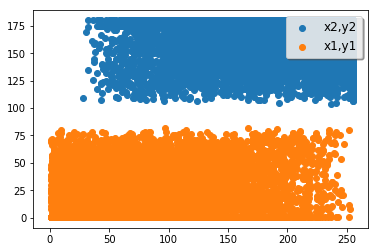

In [4]:
n1 = data0.n1
n2 = data0.n2
n3 = data0.n3
n4= data0.n4

plt.scatter(n3,n4 ,label = 'x2,y2')
plt.scatter(n1,n2,label = 'x1,y1')
plt.legend(loc='upper right', shadow=True, fontsize='large')